In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV test data separetly into a DataFrame
data1 = pd.read_csv('results/sparksofagi_1689712321361.csv')
data2 = pd.read_csv('results/2_sparksofagi_experiment_1690652566298.csv')
# Concatenate the two test data
df = pd.concat([data1, data2], ignore_index=True)
df

,llm_model,temperature,system_prompt,user_prompt,score
0,openai/gpt-4-0613,0,sparksofagi.txt,CONVERT_TEXT_TO_SPEECH.txt - 0,3.0
1,openai/gpt-4-0613,0,sparksofagi.txt,CONVERT_TEXT_TO_SPEECH.txt - 1,3.0
2,openai/gpt-4-0613,0,sparksofagi.txt,CONVERT_TEXT_TO_SPEECH.txt - 2,3.0
3,openai/gpt-4-0613,0,sparksofagi.txt,CONVERT_TEXT_TO_SPEECH.txt - 3,2.0
4,openai/gpt-4-0613,0,sparksofagi.txt,CONVERT_TEXT_TO_SPEECH.txt - 4,3.0
...,...,...,...,...,...
636,openai/gpt-4-0613,0,sparksofagi.txt,SEND_EMAIL.txt - 15,3.0
637,openai/gpt-4-0613,0,sparksofagi.txt,SEND_EMAIL.txt - 16,3.0
638,openai/gpt-4-0613,0,sparksofagi.txt,SEND_EMAIL.txt - 17,3.0
639,openai/gpt-4-0613,0,sparksofagi.txt,SEND_EMAIL.txt - 18,3.0


In [57]:
data1.head

<bound method NDFrame.head of              llm_model  temperature    system_prompt   
0    openai/gpt-4-0613            0  sparksofagi.txt  \
1    openai/gpt-4-0613            0  sparksofagi.txt   
2    openai/gpt-4-0613            0  sparksofagi.txt   
3    openai/gpt-4-0613            0  sparksofagi.txt   
4    openai/gpt-4-0613            0  sparksofagi.txt   
..                 ...          ...              ...   
316  openai/gpt-4-0613            0  sparksofagi.txt   
317  openai/gpt-4-0613            0  sparksofagi.txt   
318  openai/gpt-4-0613            0  sparksofagi.txt   
319  openai/gpt-4-0613            0  sparksofagi.txt   
320  openai/gpt-4-0613            0  sparksofagi.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0    3.0  
1    CONVERT_TEXT_TO_SPEECH.txt - 1    3.0  
2    CONVERT_TEXT_TO_SPEECH.txt - 2    3.0  
3    CONVERT_TEXT_TO_SPEECH.txt - 3    2.0  
4    CONVERT_TEXT_TO_SPEECH.txt - 4    3.0  
..                         

In [58]:
data2.head

<bound method NDFrame.head of              llm_model  temperature    system_prompt   
0    openai/gpt-4-0613            0  sparksofagi.txt  \
1    openai/gpt-4-0613            0  sparksofagi.txt   
2    openai/gpt-4-0613            0  sparksofagi.txt   
3    openai/gpt-4-0613            0  sparksofagi.txt   
4    openai/gpt-4-0613            0  sparksofagi.txt   
..                 ...          ...              ...   
315  openai/gpt-4-0613            0  sparksofagi.txt   
316  openai/gpt-4-0613            0  sparksofagi.txt   
317  openai/gpt-4-0613            0  sparksofagi.txt   
318  openai/gpt-4-0613            0  sparksofagi.txt   
319  openai/gpt-4-0613            0  sparksofagi.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0    3.0  
1    CONVERT_TEXT_TO_SPEECH.txt - 1    3.0  
2    CONVERT_TEXT_TO_SPEECH.txt - 2    3.0  
3    CONVERT_TEXT_TO_SPEECH.txt - 3    3.0  
4    CONVERT_TEXT_TO_SPEECH.txt - 4    3.0  
..                         

In [59]:
# filter and clean the data by excluding unwanted columns
df['user_prompt'] = df['user_prompt'].str.split('.').str[0]
filtered_df = df[['user_prompt', 'score']]
filtered_df

,user_prompt,score
0,CONVERT_TEXT_TO_SPEECH,3.0
1,CONVERT_TEXT_TO_SPEECH,3.0
2,CONVERT_TEXT_TO_SPEECH,3.0
3,CONVERT_TEXT_TO_SPEECH,2.0
4,CONVERT_TEXT_TO_SPEECH,3.0
...,...,...
636,SEND_EMAIL,3.0
637,SEND_EMAIL,3.0
638,SEND_EMAIL,3.0
639,SEND_EMAIL,3.0


In [60]:
# Identify the unique scores
unique_scores = [0, 1, 2, 3]  # the score is to confusion matrix as TP=3, FP=2, FN=1 and TN=0.

# Count the occurrences of each score for each user_prompt
summary_sparksofagi_zeroshot = df.groupby('user_prompt')['score'].value_counts().unstack()

# Ensure all scores are represented in the columns, filling with 0 where necessary
summary_sparksofagi_zeroshot = summary_sparksofagi_zeroshot.reindex(columns=unique_scores).fillna(0)

# Rename the columns as desired (cnfusion matrix)
summary_sparksofagi_zeroshot.columns = ['TN', 'FN', 'FP', 'TP']
summary_sparksofagi_zeroshot


,TN,FN,FP,TP
user_prompt,,,,
CONVERT_TEXT_TO_SPEECH,0.0,0.0,5.0,35.0
CREATE_CALENDAR_EVENT,0.0,0.0,10.0,30.0
CREATE_REMINDER,0.0,0.0,6.0,34.0
GENERATE_IMAGE,0.0,0.0,0.0,40.0
GET_CALENDAR_EVENTS,12.0,0.0,13.0,14.0
GET_CURRENT_DATE_AND_TIME,0.0,0.0,0.0,40.0
GET_CURRENT_STOCK_PRICE,0.0,0.0,0.0,39.0
GET_NEWS,0.0,0.0,0.0,40.0
GET_WEATHER,0.0,0.0,0.0,40.0


In [61]:
# Calculate Precision, Recall, and F1 Score
summary_sparksofagi_zeroshot['Precision'] = summary_sparksofagi_zeroshot['TP'] / (summary_sparksofagi_zeroshot['TP'] + summary_sparksofagi_zeroshot['FP'])
summary_sparksofagi_zeroshot['Recall'] = summary_sparksofagi_zeroshot['TP'] / (summary_sparksofagi_zeroshot['TP'] + summary_sparksofagi_zeroshot['FN'])
summary_sparksofagi_zeroshot['F1 Score'] = 2 * (summary_sparksofagi_zeroshot['Precision'] * summary_sparksofagi_zeroshot['Recall']) / (summary_sparksofagi_zeroshot['Precision'] + summary_sparksofagi_zeroshot['Recall'])

# Round to 2 decimal places
summary_sparksofagi_zeroshot['Precision'] = summary_sparksofagi_zeroshot['Precision'].round(2)
summary_sparksofagi_zeroshot['Recall'] = summary_sparksofagi_zeroshot['Recall'].round(2)
summary_sparksofagi_zeroshot['F1 Score'] = summary_sparksofagi_zeroshot['F1 Score'].round(2)

# Handle possible NaN values (caused by divisions by zero)
summary_sparksofagi_zeroshot.fillna(0, inplace=True)

# store the results in a csv file
summary_sparksofagi_zeroshot.to_csv('summary_sparksofagi_zeroshot.csv', index=True)

print(summary_sparksofagi_zeroshot)

                              TN   FN    FP    TP  Precision  Recall  F1 Score
user_prompt                                                                   
CONVERT_TEXT_TO_SPEECH       0.0  0.0   5.0  35.0       0.88     1.0      0.93
CREATE_CALENDAR_EVENT        0.0  0.0  10.0  30.0       0.75     1.0      0.86
CREATE_REMINDER              0.0  0.0   6.0  34.0       0.85     1.0      0.92
GENERATE_IMAGE               0.0  0.0   0.0  40.0       1.00     1.0      1.00
GET_CALENDAR_EVENTS         12.0  0.0  13.0  14.0       0.52     1.0      0.68
GET_CURRENT_DATE_AND_TIME    0.0  0.0   0.0  40.0       1.00     1.0      1.00
GET_CURRENT_STOCK_PRICE      0.0  0.0   0.0  39.0       1.00     1.0      1.00
GET_NEWS                     0.0  0.0   0.0  40.0       1.00     1.0      1.00
GET_WEATHER                  0.0  0.0   0.0  40.0       1.00     1.0      1.00
NOT_AVAILABLE              196.0  0.0  14.0  30.0       0.68     1.0      0.81
SEND_EMAIL                   0.0  0.0   0.0  40.0   

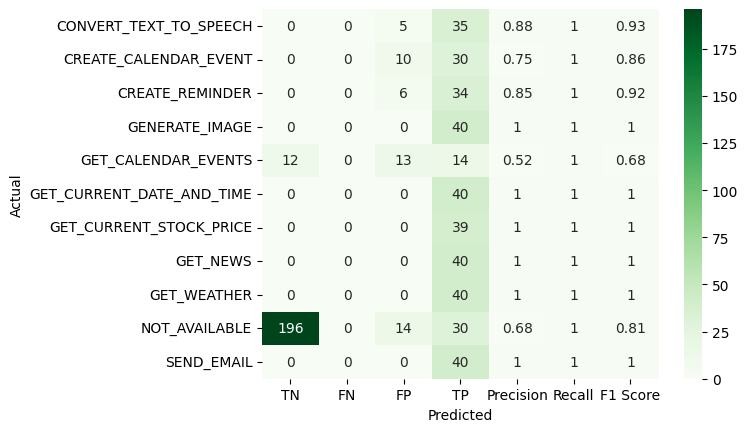

In [62]:
# Plot the confusion matrix
sns.heatmap(summary_sparksofagi_zeroshot, annot=True, cmap='Greens', fmt='g'), plt.xlabel('Predicted'), plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [63]:
# Generate the DataFrame to LaTeX format so that it can be copied and pasted into our thesis
# Formatting TN, FN, FP, and TP columns to 0 decimal places
for col in ['TN', 'FN', 'FP', 'TP']:
    summary_sparksofagi_zeroshot[col] = summary_sparksofagi_zeroshot[col].astype(int)

# Formatting the 'Precision', 'Recall', and 'F1 Score' columns to 2 decimal places
for col in ['Precision', 'Recall', 'F1 Score']:
    summary_sparksofagi_zeroshot[col] = summary_sparksofagi_zeroshot[col].round(2)

# Convert the DataFrame to LaTeX
latex_code = summary_sparksofagi_zeroshot.to_latex(float_format="%.2f")
print(latex_code)

\begin{tabular}{lrrrrrrr}
\toprule
 & TN & FN & FP & TP & Precision & Recall & F1 Score \\
user_prompt &  &  &  &  &  &  &  \\
\midrule
CONVERT_TEXT_TO_SPEECH & 0 & 0 & 5 & 35 & 0.88 & 1.00 & 0.93 \\
CREATE_CALENDAR_EVENT & 0 & 0 & 10 & 30 & 0.75 & 1.00 & 0.86 \\
CREATE_REMINDER & 0 & 0 & 6 & 34 & 0.85 & 1.00 & 0.92 \\
GENERATE_IMAGE & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
GET_CALENDAR_EVENTS & 12 & 0 & 13 & 14 & 0.52 & 1.00 & 0.68 \\
GET_CURRENT_DATE_AND_TIME & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
GET_CURRENT_STOCK_PRICE & 0 & 0 & 0 & 39 & 1.00 & 1.00 & 1.00 \\
GET_NEWS & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
GET_WEATHER & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
NOT_AVAILABLE & 196 & 0 & 14 & 30 & 0.68 & 1.00 & 0.81 \\
SEND_EMAIL & 0 & 0 & 0 & 40 & 1.00 & 1.00 & 1.00 \\
\bottomrule
\end{tabular}

